In [677]:
## importing
import pandas as pd
import numpy as np
import urllib.request
import json
import string
import spacy
from spacy.lang.de.stop_words import STOP_WORDS
import nltk
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from google_trans_new import google_translator

In [625]:
## reading data
df = pd.read_json('https://talentbait-assets.s3.eu-central-1.amazonaws.com/tech_soft_none.json')
# df = pd.read_json('dataset.json')
df = pd.json_normalize(data['data'])
df.head()

,text,label
0,"Standort Trovarit AG München, Deutschland",none
1,Wir freuen uns auf Ihre Bewerbung unter Angabe...,none
2,Qualifikation zur Heimleitung gemäß Heimperson...,tech
3,Gute organisatorische und konzeptionelle Fähig...,soft
4,"Teamfähigkeit, hohe Flexibilität und Einsatzbe...",soft


In [626]:
## defining names
text = df['text']
label = df['label']

none    4325
soft    3635
tech    2289
Name: label, dtype: int64


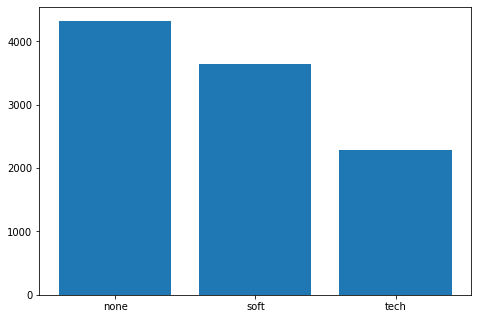

In [669]:
## checking data
print(df["label"].value_counts())

## visualizing
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["none", "soft", "tech"]
y_axis = [df["label"].value_counts()[0],df["label"].value_counts()[1],df["label"].value_counts()[2]]
ax.bar(x_axis, y_axis)
plt.show()

In [628]:
## helpers for data cleaning
punctuation = string.punctuation
stop_words = list(STOP_WORDS)
nlp = spacy.load('de_core_news_sm')
# stemmer = SnowballStemmer("german")

In [629]:
## function that cleans input text
def cleaning_function(input_text):
    text = nlp(input_text)
    tokens = []
    for token in text:
        temp = token.lemma_.lower()
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stop_words and token not in punctuation:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [630]:
# cleaned_text = cleaning_function_2(text[1])
# print(cleaned_text)

In [631]:
## variables for train and test data
X = text
y = label

In [632]:
## SVC using tfidf (bag of words)

tfidf = TfidfVectorizer(tokenizer = cleaning_function)
classifier = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)
# print(X_train.shape, X_test.shape)
SVC_clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
SVC_clf.fit(X_train, y_train)
y_pred = SVC_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        none       0.94      0.98      0.96      1337
        soft       0.95      0.94      0.94      1068
        tech       0.94      0.87      0.90       670

    accuracy                           0.94      3075
   macro avg       0.94      0.93      0.94      3075
weighted avg       0.94      0.94      0.94      3075

Confusion Matrix:
[[1314   12   11]
 [  43 1000   25]
 [  41   46  583]]


In [634]:
### KNN using tfidf (bag of words)

tfidf = TfidfVectorizer(tokenizer = cleaning_function)
classifier = KNeighborsClassifier(n_neighbors=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

KNN_clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
KNN_clf.fit(X_train, y_train)
y_pred = KNN_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        none       0.65      0.99      0.79      1337
        soft       0.96      0.70      0.81      1068
        tech       0.95      0.37      0.53       670

    accuracy                           0.75      3075
   macro avg       0.85      0.69      0.71      3075
weighted avg       0.82      0.75      0.74      3075

Confusion Matrix:
[[1327    7    3]
 [ 314  743   11]
 [ 394   27  249]]


In [636]:
### SVM using tfidf (bag of words)

tfidf = TfidfVectorizer(tokenizer = cleaning_function)
classifier = svm.SVC(kernel='linear', C=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

SVM_clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])
SVM_clf.fit(X_train, y_train)
y_pred = SVM_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        none       0.95      0.98      0.96      1337
        soft       0.94      0.94      0.94      1068
        tech       0.94      0.88      0.91       670

    accuracy                           0.94      3075
   macro avg       0.94      0.93      0.94      3075
weighted avg       0.94      0.94      0.94      3075

Confusion Matrix:
[[1308   16   13]
 [  39 1005   24]
 [  36   47  587]]


In [700]:
## predicting via user input

user_input_text = input("Enter your input in German: ")

## additional translation feature if input is not in German
translator = google_translator()
if(translator.detect(user_input_text)[0]!='de'):
    print("Input language detected:", translator.detect(user_input_text)[1])
    in_german = translator.translate(user_input_text, lang_tgt='de')
    print("Translated to German:", in_german)
    user_input_text = in_german

svc_pred = SVC_clf.predict([user_input_text])
knn_pred = KNN_clf.predict([user_input_text])
svm_pred = SVM_clf.predict([user_input_text])

print("\n")

print ("Prediction via SVC:", svc_pred[0])
print ("Prediction via KNN:", knn_pred[0])
print ("Prediction via SVM:", knn_pred[0])

Enter your input in German: gute in python


Prediction via SVC: tech
Prediction via KNN: none
Prediction via SVM: none


In [656]:
only_tech_tokens = []
only_soft_tokens = []
only_none_tokens = []

for i in range(0, text.shape[0]):
    clean_token = cleaning_function(text[i])
    
    if label[i] == "tech":
        for t in clean_token:
            only_tech_tokens.append(t)
            
    elif label[i] == "soft":
        for t in clean_token:
            only_soft_tokens.append(t)
            
    else:
        for t in clean_token:
            only_none_tokens.append(t)
            
freq_tech_tokens = nltk.FreqDist(only_tech_tokens)
freq_soft_tokens = nltk.FreqDist(only_soft_tokens)
freq_none_tokens = nltk.FreqDist(only_none_tokens)

Visual representation of most common words used in dataset of label 'none'


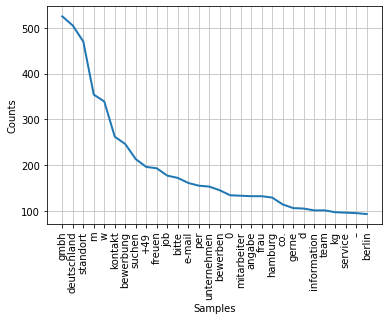

In [658]:
# Most common words used in dataset of label none
print("Visual representation of most common words used in dataset of label 'none'")
freq_none_tokens.plot(30, cumulative=False)

Visual representation of most common words used in dataset of label 'tech'


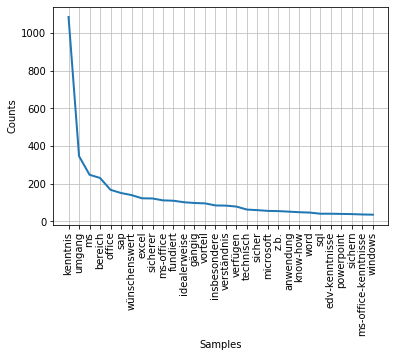

In [659]:
# Most common words used in dataset of label tech
print("Visual representation of most common words used in dataset of label 'tech'")
freq_tech_tokens.plot(30, cumulative=False)

Visual representation of most common words used in dataset of label 'soft'


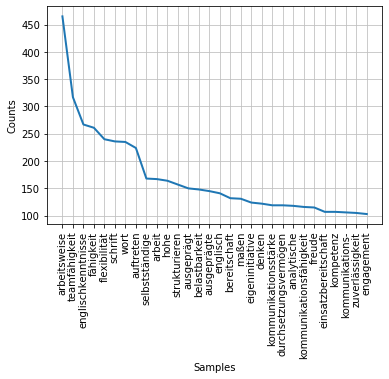

In [660]:
# Most common words used in dataset of label soft
print("Visual representation of most common words used in dataset of label 'soft'")
freq_soft_tokens.plot(30, cumulative=False)

In [708]:
import anvil.server
anvil.server.connect("I6ZCACWHQSGJRHKJKAK4CEPD-KDZYNHP6HUKJWUBA")

In [712]:
@anvil.server.callable
def predict_class(user_input):
    translator = google_translator()
    if(translator.detect(user_input)[0]!='de'):
        user_input = translator.translate(user_input, lang_tgt='de')
    return (SVC_clf.predict([user_input])[0])

# Accessible via:
# https://KDZYNHP6HUKJWUBA.anvil.app/TYLJ73PI6MEOA76NVDBMX4JS